<h1>BITS F464 - Semester 1 - MACHINE LEARNING</h1>
<br>
<h4>ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION</h4>
<h4>Team number: 8</h4>
<h4>Team members: Arnav Arvind, Arnav Yayavaram, Shailesh Chandra Rao, Siddharth Yayavaram, Suryansh Chandola</h4>

<h4>Team member Ids: 2021A7PS2719H, 2021A7PS3117H, 2021A7PS2064H, 2021A7PS3116H, 2021A7PS0058H</h4>

<h4>This assignment aims to identify the differences between three sets of Machine Learning models.</h4>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sdv.metadata import SingleTableMetadata    #this has been imported to create a metadata object for our dataset

<h1>1. Dataset Generation</h1>

In [5]:
input_df = pd.read_csv('diabetes2 - Diabetes.xls.csv')
input_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
metadata = SingleTableMetadata()    #creating the instance
metadata.detect_from_dataframe(data=input_df)    #automatically detect metadata from your dataframe

In [7]:
metadata.to_dict()    #inspecting metadata

{'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1',
 'columns': {'Pregnancies': {'sdtype': 'numerical'},
  'Glucose': {'sdtype': 'numerical'},
  'BloodPressure': {'sdtype': 'numerical'},
  'SkinThickness': {'sdtype': 'numerical'},
  'Insulin': {'sdtype': 'numerical'},
  'BMI': {'sdtype': 'numerical'},
  'DiabetesPedigreeFunction': {'sdtype': 'numerical'},
  'Age': {'sdtype': 'numerical'},
  'Outcome': {'sdtype': 'numerical'}}}

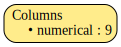

In [8]:
metadata.visualize(    #this gives me a visual representation of the metadata. It is a single table with 9 numerical columns
    show_table_details='summarized',
    output_filepath='my_metadata.png'    
)

In [9]:
from sdv.lite import SingleTablePreset

In [10]:
synthesizer = SingleTablePreset(metadata, name='FAST_ML')    #creating a custom synthesizer using the FAST_ML preset synthesizer
synthesizer.fit(input_df)                                    #and the metadata for the dataframe created

In [11]:
synthetic_data = synthesizer.sample(num_rows=500)
synthetic_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,149,96,19,10,38.387409,0.561331,40,1
1,0,151,44,6,105,26.125923,0.463959,27,1
2,3,169,57,24,240,33.224573,0.541364,36,0
3,4,86,61,35,0,32.918264,0.526311,39,0
4,6,75,62,31,77,37.453830,0.178734,21,0


In [12]:
synthetic_data.to_csv('synthetic_dataset.csv')    #the generated dataset can be found in the same directory as this notebook

<h1>2. Preprocess and perform exploratory data analysis of the dataset <t>obtained</h1>

In [13]:
synthetic_data.shape    #the generated dataset has 500 rows and 9 columns

(500, 9)

In [19]:
synthetic_data.corr().style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.056008,0.076867,-0.095012,0.007312,-0.069170,-0.112379,0.526535,0.140868
Glucose,0.056008,1.000000,0.125647,0.048420,0.388294,0.271193,0.134433,0.217024,0.395676
BloodPressure,0.076867,0.125647,1.000000,0.276850,0.178255,0.293542,0.063545,0.196416,0.001302
SkinThickness,-0.095012,0.048420,0.276850,1.000000,0.386702,0.441714,0.143424,-0.121843,0.102990
Insulin,0.007312,0.388294,0.178255,0.386702,1.000000,0.222160,0.083254,-0.032980,0.158071
BMI,-0.069170,0.271193,0.293542,0.441714,0.222160,1.000000,0.105815,0.002211,0.249757
DiabetesPedigreeFunction,-0.112379,0.134433,0.063545,0.143424,0.083254,0.105815,1.000000,-0.007778,0.109530
Age,0.526535,0.217024,0.196416,-0.121843,-0.032980,0.002211,-0.007778,1.000000,0.094062
Outcome,0.140868,0.395676,0.001302,0.102990,0.158071,0.249757,0.109530,0.094062,1.000000


We observe that the following columns have some correlation to each other:
<table>
    <tr>
        <th>Column1</th><th>Column2</th>
    </tr>
    <tr>
        <th>Pregnancies</th><th>Age</th>
    </tr>
    <tr>
        <th>Glucose</th><th>Insulin</th>
    </tr>
    <tr>
        <th>Glucose</th><th>Outcome</th>
    </tr>
    <tr>
        <th>SkinThickness</th><th>Insulin</th>
    </tr>
    <tr>
        <th>SkinThickness</th><th>BMI</th>
    </tr>

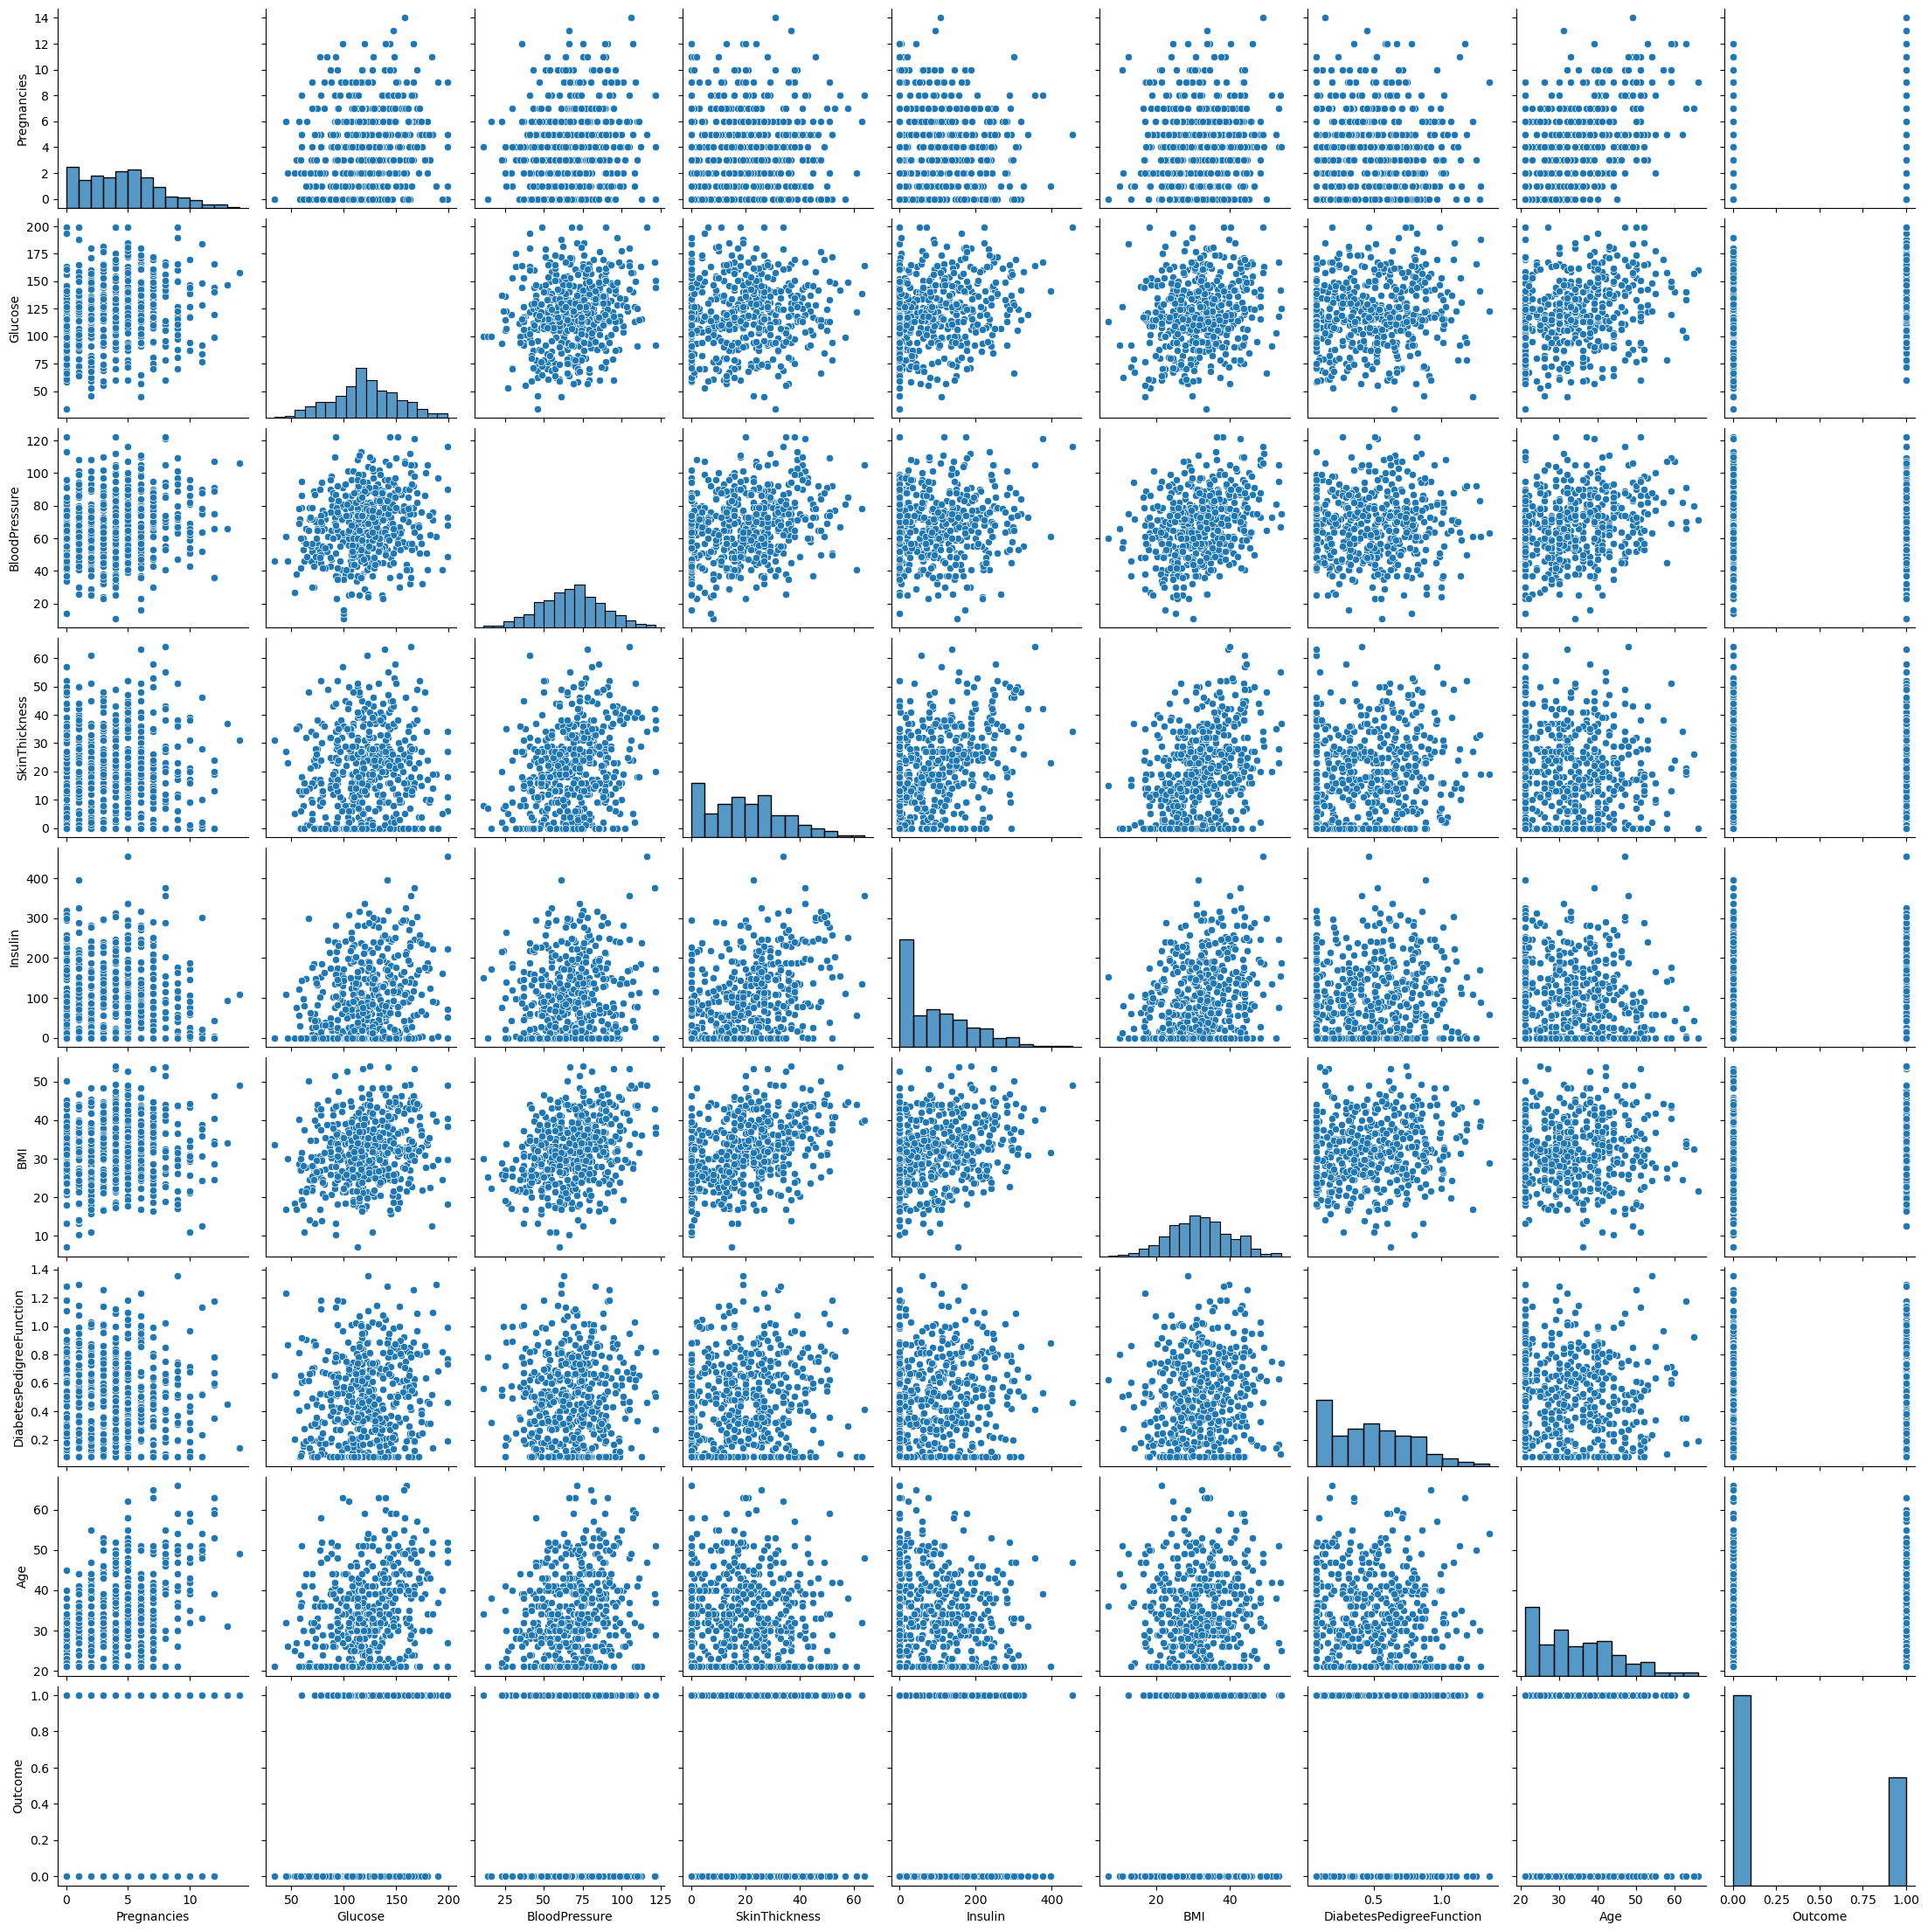

In [83]:
sns.pairplot(synthetic_data)    #plotting all the column values against each other

(array([319.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 181.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

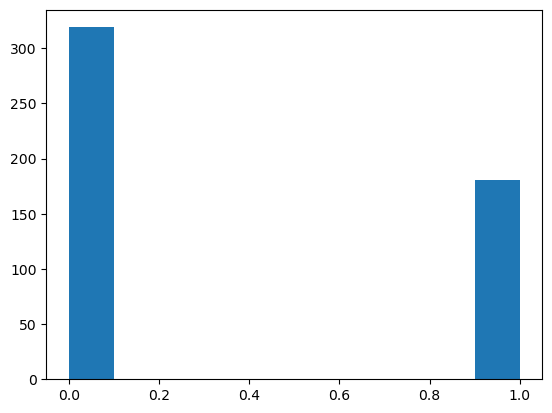

In [87]:
plt.hist(synthetic_data['Outcome'])    #we see that the dataset has more samples corresponding to outcome 0

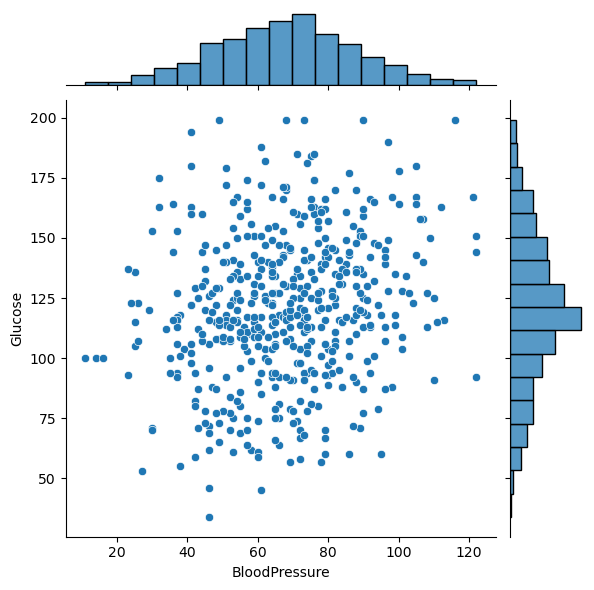

In [96]:
sns.jointplot(data=synthetic_data,x='BloodPressure',y='Glucose')    #a slight linear relation can be observed between 
                                                                    #Glucose and BLoodPressure

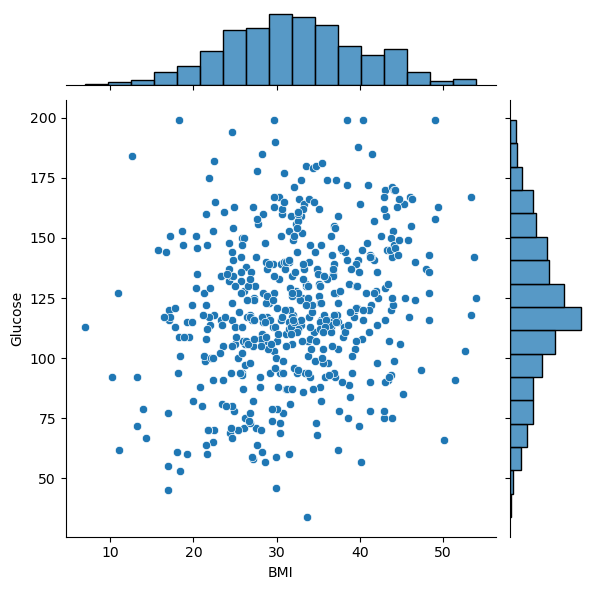

In [97]:
sns.jointplot(data=synthetic_data,x='BMI',y='Glucose')    #a slight linear relation can be observed between 
                                                          #BMI and Glucose

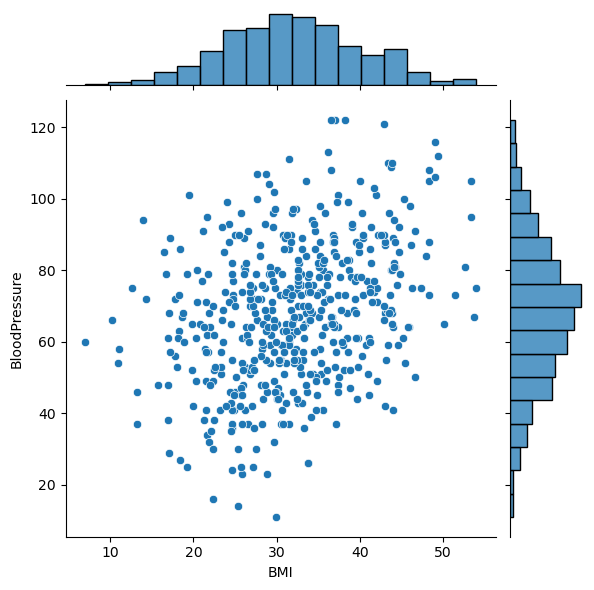

In [98]:
sns.jointplot(data=synthetic_data,x='BMI',y='BloodPressure')    #a slight linear relation can be observed between 
                                                                #BMI and BloodPressure

<Axes: xlabel='Age', ylabel='Outcome'>

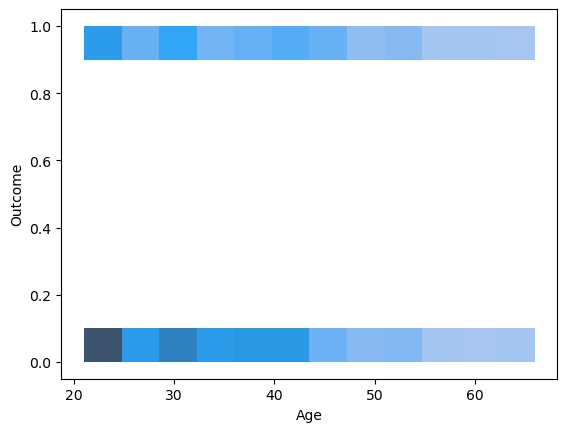

In [111]:
sns.histplot(data=synthetic_data,x='Age',y='Outcome') 

<h1>References(This is the raw thing we'll format it later)</h1>
<br>
<ol>
    <li>SDV: Synthesize a table (Gaussian Copula).ipynb - Colaboratory (google.com) (for creating data using Gaussian Copula)</li>
    <li>Gaussian Copula - an overview | ScienceDirect Topics (for understanding about Gaussian Copulas)</li>
    <li>Data Preparation - Synthetic Data Vault (sdv.dev) (the actual thing which helped create the dataset)</li>
</ol>
    